#K-Nearest neighbors for Machine failure detection
## This is a binary classification problem

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r'C:\Users\Suyash Tambe\Desktop\New folder\predictive_maintenance.csv')

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.head()
del df['UDI']
del df['Type']
df.index=df['Product ID']
del df['Product ID']

In [ ]:
df.head()

In [ ]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [3]:
label=df['Target'].to_numpy()

In [ ]:
import numpy as np
features=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
features=df[features]
print(features.shape)

(10000, 5)


In [ ]:
scaler=MinMaxScaler()
Xtransformed=scaler.fit_transform(features)

In [ ]:
Xtransformed

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [ ]:
Xtransformed.shape
Xtrain=Xtransformed[:6000,:]
Xval=Xtransformed[6000:8000,:]
Xtest=Xtransformed[8000:,:]

In [ ]:
trainLabel=label[:6000,]
valLabel=label[6000:8000,]
testLabel=label[8000:,]

In [ ]:
k=np.arange(1,21,1)
from sklearn.metrics import accuracy_score
train_score=[]
for i in k:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(Xtrain,trainLabel)
    train_score.append(model.score(Xtrain,trainLabel))

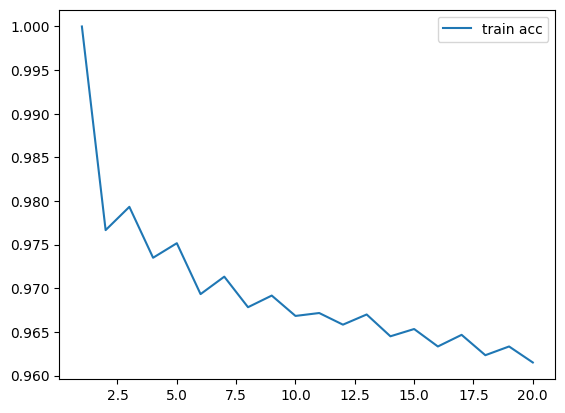

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k,train_score)
plt.legend(['train acc'])

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)

model=model.fit(Xtrain,trainLabel)

yval_op=model.predict(Xval)
print('Validation score is {} %'.format(accuracy_score(valLabel,yval_op)*100))

Validation score is 98.0 %


In [ ]:
labelPredicted=model.predict(Xtest)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(testLabel,labelPredicted)

array([[1953,    8],
       [  24,   15]])

In [ ]:
print(classification_report(testLabel,labelPredicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1961
           1       0.65      0.38      0.48        39

    accuracy                           0.98      2000
   macro avg       0.82      0.69      0.74      2000
weighted avg       0.98      0.98      0.98      2000

